In [19]:
#imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import joblib

import seaborn as sns
import matplotlib.pyplot as plt



In [33]:
dataset = pd.read_csv('/Users/eitanyona/Documents/Hit/Second Year /DS project/healthcare-dataset-stroke-data.csv')
# dataset = dataset.dropna()
dataset_smoke_man_women = dataset.copy()
coulms = ['gender', 'smoking_status','stroke']
for element in dataset_smoke_man_women:
    if element not in coulms:
        dataset_smoke_man_women.drop(element,axis=1,inplace=True)

# for i in range(df.shape[0]): #iterate over rows
#     for j in range(df.shape[1]): #iterate over columns
#         if df.at[i, j] == "smokes": #get cell value
#         dataset_smoke_man_women.drop([i],axis=0,inplace=True)




dataset_smoke_man_women = dataset_smoke_man_women.loc[dataset_smoke_man_women['smoking_status'] == 'smokes']
dataset_smoke_man_women.drop("smoking_status", axis=1, inplace=True)
dataset_smoke_man_women = dataset_smoke_man_women.loc[dataset_smoke_man_women['gender'] == 'Male']


print(dataset_smoke_man_women)


     gender  stroke
16     Male       1
17     Male       1
28     Male       1
30     Male       1
42     Male       1
...     ...     ...
5041   Male       0
5048   Male       0
5084   Male       0
5090   Male       0
5099   Male       0

[337 rows x 2 columns]


Text(0.5, 1.0, 'Stroke / Work Type')

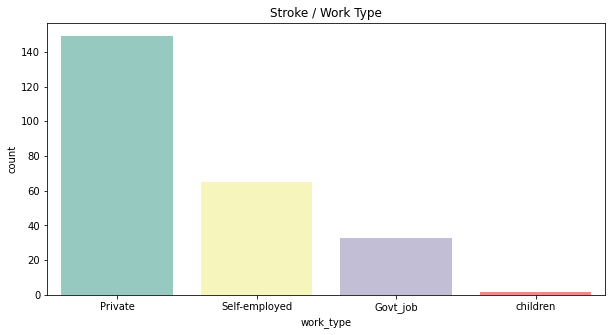

In [21]:
plt.figure(figsize=(10,5))
stroke = dataset.loc[dataset['stroke']==1]
sns.countplot(data=stroke,x='work_type', palette="Set3")
plt.title("Stroke / Work Type")

Text(0.5, 1.0, 'Stroke / Ever-Married')

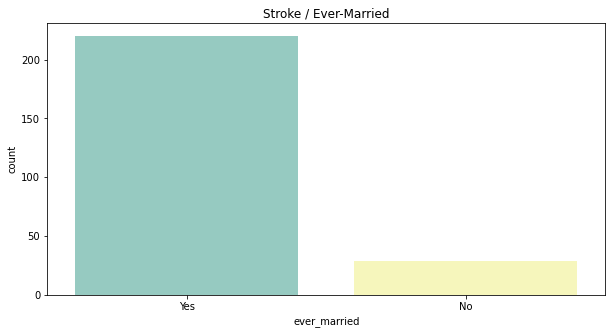

In [22]:
plt.figure(figsize=(10,5))
stroke = dataset.loc[dataset['stroke']==1]
sns.countplot(data=stroke,x='ever_married', palette="Set3")
plt.title("Stroke / Ever-Married")

Text(0.5, 1.0, 'Stroke / Smoking Status')

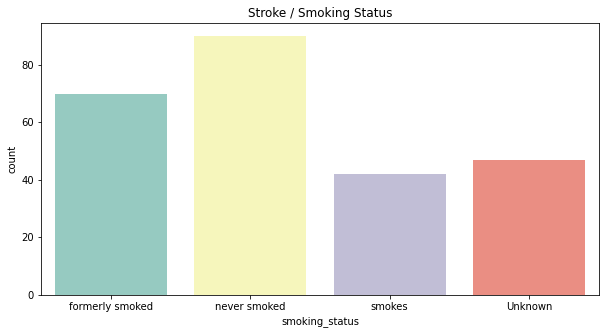

In [23]:
plt.figure(figsize=(10,5))
stroke = dataset.loc[dataset['stroke']==1]
sns.countplot(data=stroke,x='smoking_status', palette="Set3")
plt.title("Stroke / Smoking Status")

Text(0.5, 1.0, 'Stroke / Residence Type')

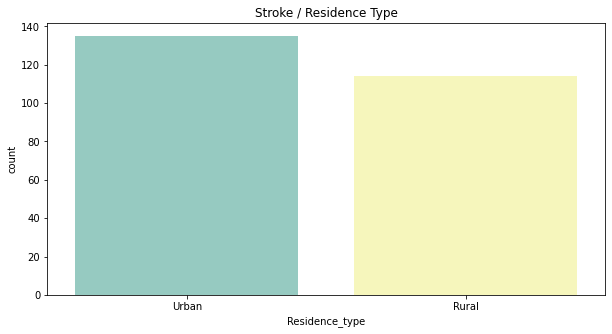

In [24]:
plt.figure(figsize=(10,5))
stroke = dataset.loc[dataset['stroke']==1]
sns.countplot(data=stroke,x='Residence_type', palette="Set3")
plt.title("Stroke / Residence Type")

Text(0.5, 1.0, 'Stroke / Hypertension')

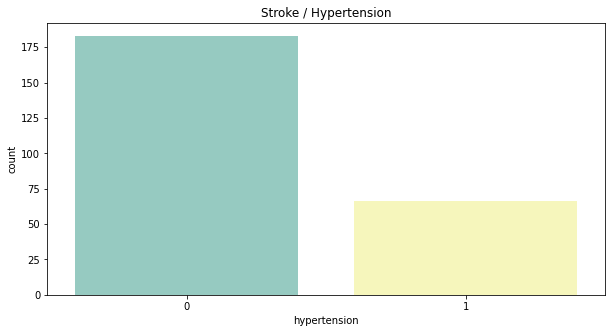

In [25]:
plt.figure(figsize=(10,5))
stroke = dataset.loc[dataset['stroke']==1]
sns.countplot(data=stroke,x='hypertension', palette="Set3")
plt.title("Stroke / Hypertension")

Text(0.5, 1.0, 'Stroke / Heart Disease')

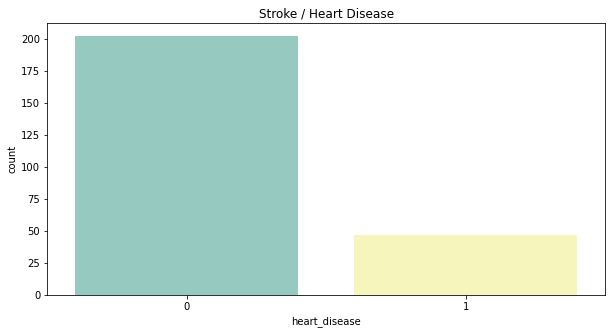

In [26]:
plt.figure(figsize=(10,5))
stroke = df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='heart_disease', palette="Set3")
plt.title("Stroke / Heart Disease")

In [27]:
#data cleaning & mapping before machine learning

df = pd.read_csv('/Users/eitanyona/Documents/Hit/Second Year /DS project/healthcare-dataset-stroke-data.csv')
# df = df.dropna()
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df.drop(['id'], axis='columns', inplace=True) #remove id not releveant 
replace_map = {'Yes':1,'No':0, #ever amarried
               'Urban':0,'Rural':1}#residence type


df.replace(replace_map, inplace = True)
data_top = df.head() 
df=df.drop(df.index[500:5100])

# display 

df['gender'] = pd.Categorical(df['gender'])
dfDummies_gender = pd.get_dummies(df['gender'], prefix = 'gender_encoded')

df['work_type'] = pd.Categorical(df['work_type'])
dfDummies_work_type = pd.get_dummies(df['work_type'], prefix = 'work_type_encoded')

df['smoking_status'] = pd.Categorical(df['smoking_status'])
dfDummies_smoking_status = pd.get_dummies(df['smoking_status'], prefix = 'smoking_status_encoded')

df = pd.concat([df, dfDummies_gender], axis=1)
df = pd.concat([df, dfDummies_work_type], axis=1)
df = pd.concat([df, dfDummies_smoking_status], axis=1)

df.drop("gender", axis=1, inplace=True)
df.drop("work_type", axis=1, inplace=True)
df.drop("smoking_status", axis=1, inplace=True)

#df['smoking_status'] = pd.Categorical(df['smoking_status'])
#dfDummies_smoking_status = pd.get_dummies(df['smoking_status'], prefix = 'smoking_status_encoded')
#dfDummies_smoking_status

# df.info()
df

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_encoded_Female,gender_encoded_Male,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,67.0,0,1,1,0,228.69,36.600000,1,0,1,0,0,1,0,0,0,1,0,0
1,61.0,0,0,1,1,202.21,28.893237,1,1,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,1,1,105.92,32.500000,1,0,1,0,0,1,0,0,0,0,1,0
3,49.0,0,0,1,0,171.23,34.400000,1,1,0,0,0,1,0,0,0,0,0,1
4,79.0,1,0,1,1,174.12,24.000000,1,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,0,83.75,28.893237,0,1,0,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,1,0,125.20,40.000000,0,1,0,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,1,1,82.99,30.600000,0,1,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,1,1,166.29,25.600000,0,0,1,0,0,1,0,0,0,1,0,0


In [36]:
scaled_features = df.copy()
col_names = ['age', 'avg_glucose_level','bmi']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
df = scaled_features

(510, 19)

In [37]:
X = df.iloc[:,0:20]
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print(y)
print(df)
df.shape

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 510, dtype: int64
           age  hypertension  heart_disease  ever_married  Residence_type  \
0     0.543628             0              1             1               0   
1     0.270930             0              0             1               1   
2     1.134474             0              1             1               1   
3    -0.274466             0              0             1               0   
4     1.089024             1              0             1               1   
...        ...           ...            ...           ...             ...   
5105  1.134474             1              0             1               0   
5106  1.179924             0              0             1               0   
5107 -0.910762             0              0             1               1   
5108 -0.183567             0              0             1               1   
510

(510, 19)

In [30]:
import math 
print(math.sqrt(len(y_test)))
print(len(y_test))

10.099504938362077
102


In [31]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
classifier.fit(X_train,y_train)
joblib.dump(classifier,'v1_stroke.joblib')
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test,y_pred))
# model = joblib.load('v1_stroke.joblib')
# prediction = model.predict([[0.634486,0,1,1,0,1.989492,0.795659,1,0,1,0,0,1,0,0,0,1,0,0]])
# preditciton_2 = model.predict([[0.048458,0,0,1,0,-0.731651,0.038201,0,1,0,0,0,0,1,0,0,1,0,0]])
# print(prediction)
# print(preditciton_2)

0.9117647058823529
